In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
import tensorflow.keras.backend as K
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D,Activation #Dropout, BatchNormalization(these two libraries will be added if required)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical


### Downloading the Data set

In [26]:
(x_train,y_train),(x_test,y_test) = mnist.load_data() #loading the mnist dataset 

### Data Analysis and Visualization

Checking the type of Data

In [27]:
type(x_train),type(x_test),type(y_train),type(y_test)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

Visualizing 1st ten samples of our training set

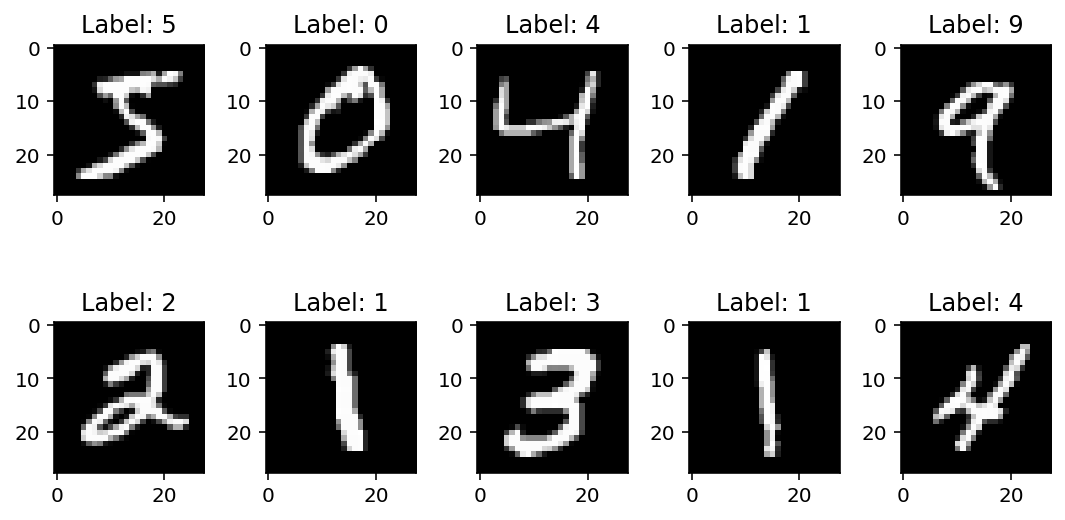

In [28]:
n_rows = 2 #Number of rows
n_cols = 5# No of columns
# plot images
figure, axes = plt.subplots(n_rows, n_cols, figsize=(1.5*n_cols,2*n_rows))
for i in range(10):
    ax = axes[i//n_cols, i%n_cols]
    ax.imshow(x_train[i], cmap='gray')
    ax.set_title('Label: {}'.format(y_train[i]))
plt.tight_layout()
plt.show()

Checking the test set for same samples

In [29]:
y_train[0:10]# CHecking the 1st ten entries of y_train

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [34]:
y_train.shape, y_test.shape

((60000,), (10000,))

In [35]:
x_train.shape,x_test.shape#shapes of x_train and x_test

((60000, 28, 28, 1), (10000, 28, 28, 1))

Convert the grayscale images (from x_train and x_test) from 2-D to 3-D.

In [36]:
x_train=x_train.reshape(-1,28,28,1)# resolution of each image is 28x28 ans 1 is for single color channel while -1 tells keras to get the actual value which is number of immages assign to the variable.x_train and x_test are 4 dimentional(4th dimension is index)
x_test=x_test.reshape(-1,28,28,1) 

Before proceeding further as this is multiclass classification problem so comman practice for this to encode output y (that is stored as class integer values) into one hot before modeling.

In [37]:
y_train_categ= to_categorical(y_train)# convert y_train into form readable by keras
y_test_categ= to_categorical(y_test)  # convert y_train into form readable by keras

### Normalizing the Data

The value of each pixel is between 0-255. We are going to normalize it so it becomes in range of 0-1.

In [38]:
x_train.dtype,x_test.dtype #the data type of x_train and x_test is uint8. Here we are checking data type.

(dtype('uint8'), dtype('uint8'))

In [39]:
x_train = x_train.astype('float32')#  So first of all we convert x_train and x_test into float32 so that they can adjust decimal values.
x_test = x_test.astype('float32')

In [40]:
x_train.dtype,x_test.dtype # now its data type is float32

(dtype('float32'), dtype('float32'))

In [41]:
x_train = x_train/255 #currently each pixel intensity value is 0-255 we want to normalize it by dividing with 255
x_test = x_test/255

### CNN

In [42]:
model = Sequential()# Selecting Sequential Model
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape = (28,28,1)))# 1-D CNN with 32 filters 3,3 is filter dimentions,it takes a single (3-D input) image input of shape(28,28,1) while x_train and x_test are 4 dimentional,its 4th dimension is index
#in upper line of code 32 3 by 3 filters are defined.also by default there is no padding, here it is not necessary to include it.
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())# one long list of values where every value representing a pixel

model.add(Dense(128,activation = 'relu'))# Dense layer with 128 inputs. The value of each pixel from last Flaten layer will connected to each input from 128 inputs of this layer. We are applying relu activation to each of this neoron.here are 128 neorons.
#The process in upper line of code is computationally expensive in case of higher resolution image.
model.add(Dense(10,activation= 'softmax'))# This is o/p layer with 10 neorons(10 neorons are actually 10 classis) .We used Softmax aactivation function because it is multiclass classification.

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


### Compilng Model

In [44]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])# Here we selected the ctegorical_crossentropy loss.it is normally used with multiclass classification. We state here acccuracy metric because we want to track it.


### Training Model

In [21]:
history = model.fit(x_train,y_train_categ,batch_size=32, epochs=2,verbose=1,validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/2
42000/42000 [==============================] - 4651s 111ms/sample - loss: 0.1790 - accuracy: 0.9483 - val_loss: 0.0817 - val_accuracy: 0.9760
Epoch 2/2
42000/42000 [==============================] - 4900s 117ms/sample - loss: 0.0596 - accuracy: 0.9821 - val_loss: 0.0705 - val_accuracy: 0.9795


In [22]:
model.evaluate(x_test,y_test_categ)

10000/10000 [==============================] - 370s 37ms/sample - loss: 0.0558 - accuracy: 0.9817


[0.055820386092644184, 0.9817]

### Saving our model

To avoid training of model again and again we save our model with the help of following code

In [48]:
from tensorflow.keras.models import model_from_json
model_Json = model.to_json()
with open("final_model.json", "w") as file:
    file.write(model_Json)
# serialize weights to HDF5
model.save_weights("final_model.h5")


To import the model again 

In [49]:
file = open('final_model.json', 'r')
load_model = file.read()
file.close()
loaded_model = model_from_json(load_model)
# load weights into new model
loaded_model.load_weights("final_model.h5")

                                        copyright@Faizan_Hameed(2021)